<a href="https://colab.research.google.com/github/rishabhpurohit/CIFAR-10ClassificationProject/blob/master/Model_Training_%2B_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CIFAR 10 DATASET MACHINE LEARNING IMAGE CLASSIFICATION PROJECT

### Importing libraries and dataset from file

In [ ]:
    
    from keras.datasets import cifar10
    import matplotlib.pyplot as plt
     
    (train_X,train_Y),(test_X,test_Y) = cifar10.load_data()

### Getting Samples from data

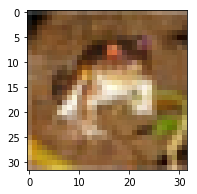

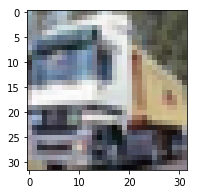

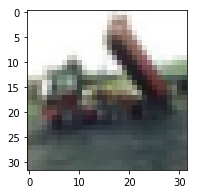

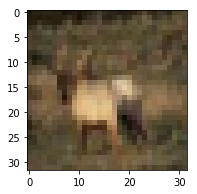

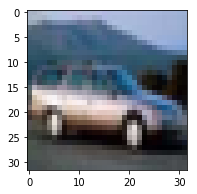

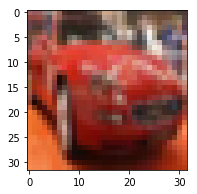

In [ ]:
n=6
for i in range(n):
  plt.figure(figsize=(20,10))
  plt.subplot(330+1+i)
  plt.imshow(train_X[i])
  plt.show()

### Import the required layers and modules to create our convolution neural net architecture.

In [ ]:
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import Dropout
    from keras.layers import Flatten
    from keras.constraints import maxnorm
    from keras.optimizers import SGD
    from keras.layers.convolutional import Conv2D
    from keras.layers.convolutional import MaxPooling2D
    from keras.utils import np_utils

### Now Convert the Pixel values of the dataset to float type and then Normalize the Dataset.

In [ ]:
    # Converting to float
    train_x=train_X.astype('float32')
    test_X=test_X.astype('float32')
    
    # normalization
    train_X=train_X/255.0
    test_X=test_X/255.0

###  Now perform the one-hot encoding for target classes

In [ ]:
    train_Y=np_utils.to_categorical(train_Y)
    test_Y=np_utils.to_categorical(test_Y)
     
    num_classes=test_Y.shape[1]

### Then we configure the Sequential model by add the respective layers

In [ ]:
    model=Sequential()
    model.add(Conv2D(32,(3,3),input_shape=(32,32,3),
        padding='same',activation='relu',
        kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.2))
    model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=maxnorm(3)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(512,activation='relu',kernel_constraint=maxnorm(3)))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

### Configure the optimizer and Compile the model

In [ ]:
    # Using sigmoid
    
    sgd=SGD(lr=0.01,momentum=0.9,decay=(0.01/25),nesterov=False)


    #  Compile the model
    model.compile(loss='categorical_crossentropy',
      optimizer=sgd,
      metrics=['accuracy'])

### View the model summary again for better understanding and final look of model architecture

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)              

### Begin Training the model

In [ ]:
    model.fit(train_X,train_Y,
        validation_data=(test_X,test_Y),
        epochs=10,batch_size=32)


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 35s 706us/step - loss: 1.7212 - accuracy: 0.3802 - val_loss: 1.4040 - val_accuracy: 0.4983
Epoch 2/10
50000/50000 [==============================] - 15s 298us/step - loss: 1.3566 - accuracy: 0.5128 - val_loss: 1.2241 - val_accuracy: 0.5684
Epoch 3/10
50000/50000 [==============================] - 15s 296us/step - loss: 1.1879 - accuracy: 0.5768 - val_loss: 1.1217 - val_accuracy: 0.5959
Epoch 4/10
50000/50000 [==============================] - 15s 293us/step - loss: 1.0703 - accuracy: 0.6203 - val_loss: 1.0554 - val_accuracy: 0.6251
Epoch 5/10
50000/50000 [==============================] - 15s 293us/step - loss: 0.9761 - accuracy: 0.6543 - val_loss: 1.0148 - val_accuracy: 0.6359
Epoch 6/10
50000/50000 [==============================] - 15s 295us/step - loss: 0.8932 - accuracy: 0.6826 - val_loss: 0.9781 - val_accuracy: 0.6531
Epoch 7/10
50000/50000 [==============================]

### Testing with test data for better accuracy.

In [ ]:
    _,acc=model.evaluate(test_X,test_Y)
    print(acc*100)

10000/10000 [==============================] - 1s 101us/step
68.3899998664856


### Save the trained model to a h5 file to use later.

In [ ]:
    model.save("model1_cifar_10epoch.h5")

###  Make a dictionary to map to the output classes and make predictions from the model.

In [ ]:
    results={
       0:'aeroplane',
       1:'automobile',
       2:'bird',
       3:'cat',
       4:'deer',
       5:'dog',
       6:'frog',
       7:'horse',
       8:'ship',
       9:'truck'
    }
    from PIL import Image
    import numpy as np
    im=Image.open(r"./images/my_image.jpg")
    # the input image is required to be in the shape of dataset, i.e (32,32,3)
     
    im=im.resize((32,32))
    im=np.expand_dims(im,axis=0)
    im=np.array(im)
    pred=model.predict_classes([im])[0]
    print(pred,results[pred])

3 cat


#### Yes it was a cat...